In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from datetime import datetime

In [30]:
#Read the data from excel file and show first 5 samples
SPV_df = pd.read_excel('database.xlsx')
SPV_df.head()

,edcode,data_cut_off_date,original_underlying_exposure_identifier,format,spv_country,deal_vintage,unique_identifier,original_obligor_identifier,redemption_date,geographic_region_obligor,...,original_lender_establishment_country,original_lender_legal_entity_identifier,origination_channel,originator_establishment_country,originator_legal_entity,payment_in_kind,recourse,revised_interest_rate_tenor,securitised_receivables,special_scheme
0,SPV000165100820199,2023-03-31,007-610-0111960,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,485651,NaT,ITH41,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
1,SPV000165100820199,2023-03-31,015-645-0109207,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,488057,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
2,SPV000165100820199,2023-03-31,033-620-0090734,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,414379,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
3,SPV000165100820199,2023-03-31,034-645-0058270,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,407118,NaT,ITH42,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN
4,SPV000165100820199,2023-03-31,040-620-0070585,ESMA,IT,2019,549300B0FLNFTFYQDJ30N201901,81326,NaT,ITH35,...,IT,549300B0FLNFTFYQDJ30,BRAN,IT,549300B0FLNFTFYQDJ30,False,1.0,NaN,PRIN,NaN


In [19]:
SPV_df.shape

(3214, 93)

In [5]:
SPV_df.columns

Index(['edcode', 'data_cut_off_date',
       'original_underlying_exposure_identifier', 'format', 'spv_country',
       'deal_vintage', 'unique_identifier', 'original_obligor_identifier',
       'redemption_date', 'geographic_region_obligor', 'customer_type',
       'nace_industry_code', 'obligor_basel_iii_segment', 'enterprise_size',
       'revenue', 'total_debt', 'ebitda', 'free_cashflow',
       'date_of_financials', 'debt_type', 'seniority', 'syndicated',
       'origination_date', 'maturity_date', 'purpose',
       'original_principal_balance', 'current_principal_balance',
       'total_credit_limit', 'amortisation_type',
       'principal_grace_period_end_date',
       'scheduled_principal_payment_frequency',
       'scheduled_interest_payment_frequency', 'payment_due',
       'payment_due_interest', 'balloon_amount', 'interest_rate_type',
       'current_interest_rate', 'current_interest_rate_index',
       'current_interest_rate_margin', 'interest_rate_reset_interval',
       

### 1) Compute and plot the distribution (by principal balance outstanding) of the portfolio by the first level of NACE code for the two reporting date (data_cut_off_date) include active and performing loans only.

In [6]:
#list of fist level NACE
nace_l1 = ['A','A1','A1.1','A1.1.1','A1.1.2','A1.1.3','A1.1.4','A1.1.5','A1.1.5','A1.1.9',
          'A1.2','A1.2.1','A1.2.2','A1.2.3','A1.2.4','A1.2.5','A1.2.6','A1.2.7','A1.2.8','A1.2.9',
          'A1.3','A1.3.0','A1.4','A1.4.1','A1.4.2','A1.4.3','A1.4.4','A1.4.5','A1.4.6','A1.4.7','A1.4.9',
          'A1.5','A1.5.0','A1.6','A1.6.1','A1.6.2','A1.6.3','A1.6.4','A1.7','A1.7.0','A2','A2.1','A2.1.0',
          'A2.2','A2.2.0','A2.3','A2.3.0','A2.4','A2.4.0','A3','A3.1','A3.1.1','A3.1.2','A3.2','A3.2.1','A3.2.2']

In [7]:
#filter the data needed
new_spv = SPV_df.loc[SPV_df['nace_industry_code'].isin(nace_l1)]
new_spv = new_spv[['data_cut_off_date','current_principal_balance','maturity_date', 'default_amount', 'spv_country', 'nace_industry_code']]

In [8]:
#create function to get principal balance outstanding
def get_distribof_principal_balance(date):
    date = pd.to_datetime(date)
    #make sure the loan is active and data is inside the required date
    spv = new_spv[(new_spv['data_cut_off_date'] == date) & (new_spv['maturity_date'] > date) ]
    balance = spv['current_principal_balance']
    return balance

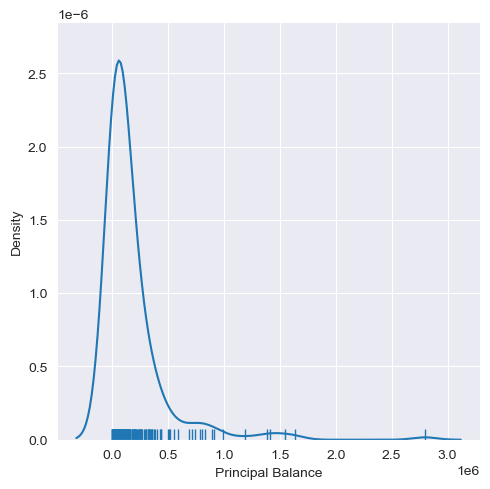

In [9]:
#Call the function 
balance = get_distribof_principal_balance('2022-12-31')
principal_balance = pd.DataFrame(balance, columns = ['current_principal_balance'])
#plot kernel density estimation type of distribution
sns.displot(data = principal_balance, x="current_principal_balance", kind='kde')
sns.rugplot(data= principal_balance, x="current_principal_balance")
plt.xlabel("Principal Balance")
plt.show()


#### There was a need to use kernel estimation distribution over histogram beacuse there is a big difference between the values in the feature current_principal_value.
#### By the distribution we can tell that most samples are in the range from 0 to 0.5x10pow6 and other that go up to 2.7x10pow6

### 2) Calculate and plot the default rate by first level of NACE code and spv_country (default rate is the measure of default calculated on the outstanding amount in default).

In [10]:
#group the data by country, nace code and calculate the mean of default amount
spv1 = new_spv.groupby(['spv_country','nace_industry_code'])['default_amount'].mean().reset_index()
spv2 =  new_spv.groupby(['spv_country'])['default_amount'].mean()
print('The mean of the default amount :', spv2[0])

The mean of the default amount : 15606.404784580498


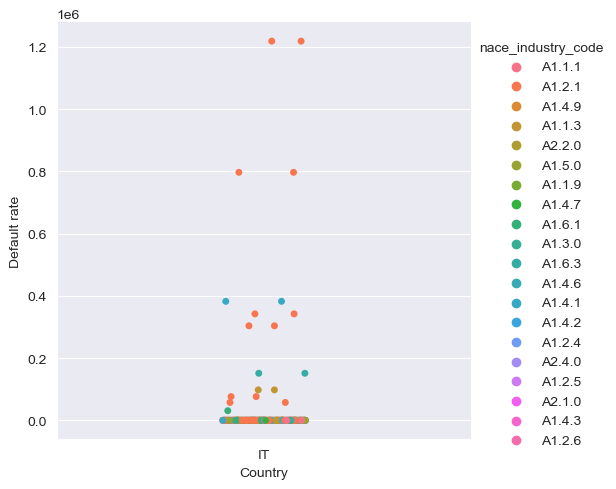

In [11]:
#plot the graph with categorical plot or boxplot  
sns.catplot(data=new_spv, x='spv_country', y='default_amount', hue = 'nace_industry_code')
plt.xlabel("Country")
plt.ylabel("Default rate")
plt.show()

#### Again the difference in the values of column default_amount is big so boxplot wasnt optimal . Used categorical plot instead because the dataframe consists of 2 categorical features
#### From the plot most of loans have 0 default rate

### 3) Calculate and plot the WALA, WAM and WAC (Weighted average loan age, Weighted average Maturity, Weighted average Coupon) of the portfolio for the two reporting date. For the coupon you can use the field current_interest_rate.

In [12]:
#filter the data needed
SPV_df=SPV_df[['origination_date','maturity_date','current_interest_rate',"current_principal_balance",'data_cut_off_date']]

#calculate the WALA
def get_WALA(date):
    spv_df = SPV_df[SPV_df['data_cut_off_date'] == date]
    
    #calculate the total principal balance of portfolio
    total = spv_df['current_principal_balance'].sum()
    #calculate the weight of each loan
    weight = spv_df['current_principal_balance'] / total
    #calculate the age of loan
    age = spv_df['data_cut_off_date'] - spv_df['origination_date']
    age = age.dt.days / 365
    
    #calculate WALA
    WALA = weight * age
    WALA = WALA.sum()
    return WALA

#calculate WAM
def get_WAM(date):
    spv_df = SPV_df[SPV_df['data_cut_off_date'] == date]
    #make sure laon is still active
    spv_df=spv_df[spv_df['maturity_date'] > spv_df['data_cut_off_date']]
    
    #calculate the total principal balance of portfolio
    total = spv_df['current_principal_balance'].sum()
    #calculate the weight of each loan
    weight = spv_df['current_principal_balance'] / total
    #calculate the time till maturity of loan
    #check if loan is active
    maturity = spv_df['maturity_date'] - spv_df['data_cut_off_date']
    maturity = maturity.dt.days / 365
    
    #calculate WALA
    WAM = weight * maturity
    WAM = WAM.sum()
    return WAM

#calculate WAC
def get_WAC(date):
    spv_df = SPV_df[SPV_df['data_cut_off_date'] == date]
    
    #calculate the total principal balance of portfolio
    total = spv_df['current_principal_balance'].sum()
    #calculate the weight percentage of each loan
    weight_percentage = (spv_df['current_principal_balance'] / total) * 100
    #get the interest 
    interest = spv_df['current_interest_rate']/100
    
    #calculate WAC
    WAC = weight_percentage * interest
    WAC = WAC.sum()
    return WAC
    

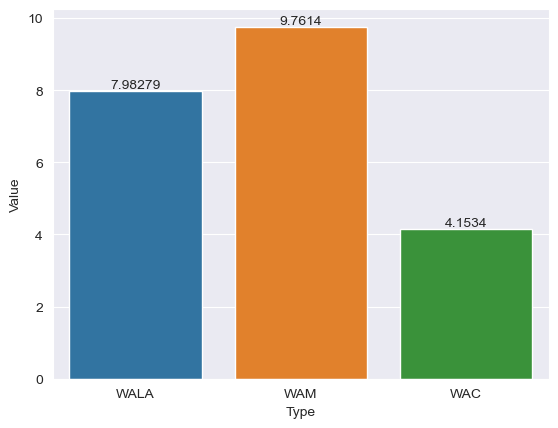

In [13]:
#call the functions to get WALA , WAM, WAC
WALA = get_WALA('2022-12-31')
WAM = get_WAM('2022-12-31')
WAC = get_WAC('2022-12-31')

#create a dataframe with the values
df = { "Type": ['WALA','WAM','WAC'],
        'Value':[WALA, WAM, WAC]
       }
df = pd.DataFrame(df)

#plot WALA , WAM, WAC
ax = sns.barplot(df, x='Type', y='Value')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


## Attempt to Predict Loan Defaults

In [151]:
#filter the data that can have an impact to loan defaults
spv_df = SPV_df[['geographic_region_obligor','enterprise_size','revenue','total_debt', 'debt_type',
                    'original_principal_balance', 'current_principal_balance', 'current_interest_rate']]
spv_df.head()

,geographic_region_obligor,enterprise_size,revenue,total_debt,debt_type,original_principal_balance,current_principal_balance,current_interest_rate
0,ITH41,MICE,583000.0,94000.0,LOLE,23000.0,5805.68,7.20
1,ITH42,NaN,NaN,NaN,LOLE,1600000.0,1529648.17,5.05
2,ITH42,MICE,36000.0,103000.0,LOLE,77600.0,47645.86,4.70
3,ITH42,SMAE,584000.0,2169000.0,LOLE,500000.0,257128.61,4.10
4,ITH35,SMAE,148000.0,1003000.0,LOLE,1400000.0,454774.50,4.65


In [152]:
#check if there are any missing values
spv_df.isnull().sum()

geographic_region_obligor        0
enterprise_size               1128
revenue                       1128
total_debt                    1128
debt_type                        0
original_principal_balance     236
current_principal_balance        0
current_interest_rate            0
dtype: int64

In [153]:
#fill na values in scalar type feature with the mean of column
mean1 = spv_df['revenue'].mean()
spv_df['revenue'].replace(np.nan, mean1, inplace=True)
mean2 = spv_df['total_debt'].mean()
spv_df['total_debt'].replace(np.nan, mean2, inplace=True)
mean3 = spv_df['original_principal_balance'].mean()
spv_df['original_principal_balance'].replace(np.nan, mean3, inplace=True)

#fill na values in categorical type feature with the most occurring class of column
class_name = spv_df['enterprise_size'].value_counts()
spv_df['enterprise_size'].replace(np.nan, class_name.index[0], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_4912\1899730255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spv_df['revenue'].replace(np.nan, mean1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4912\1899730255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spv_df['total_debt'].replace(np.nan, mean2, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4912\1899730255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [154]:
#convert categorical data for logistic regression using one hot encoding
features_one_hot = pd.get_dummies(spv_df[['geographic_region_obligor', 'enterprise_size', 'debt_type']])
features_one_hot.astype(float)

#feature matrix X
X = spv_df[['revenue','total_debt','original_principal_balance','current_principal_balance', 'current_interest_rate']].join(features_one_hot)
X.shape

(3214, 32)

In [155]:
#determine if a loan is default or not
default_amount = SPV_df['default_amount']
Default = []
for value in default_amount:
    if value > 0:
        x=1
    else:
        x=0
    Default.append(x)

#Target feature Y
default = pd.Series(Default)
Y = default.to_numpy()

In [156]:
#Get an array of values for X
X = X.values
X[0:5]

array([[5.83000000e+05, 9.40000000e+04, 2.30000000e+04, 5.80568000e+03,
        7.19999981e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.04881687e+06, 1.43583365e+06, 1.60000000e+06, 1.52964817e+06,
        5.05000019e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [157]:
#Standardize the data in X then reassign it to the variable X using the transform provided below.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [158]:
#Split the data in train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Logistic Regression

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Use GridSearchCV to find which parameters are best for the model
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [160]:
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.9502156667571562


In [161]:
print("Train score:",logreg_cv.score(X_train, Y_train))

Train score: 0.9506028782574873


In [162]:
#Predict
from sklearn.metrics import accuracy_score
y_predict = logreg_cv.predict(X_test)
print("Model's accuracy score:", accuracy_score(Y_test, y_predict))

Model's accuracy score: 0.9595645412130638


In [163]:
#function to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default']) 
    plt.show() 

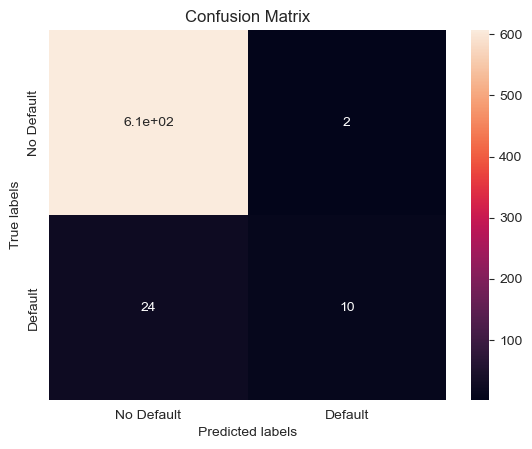

In [164]:
plot_confusion_matrix(Y_test,y_predict)